In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
np.random.seed(0)

In [38]:
# from sympy import *
# x, y = symbols('x y', real=False)
# w=diff( x**2 + y**2, y,evaluate=True)
# print(diff( x**2 + y**2, y))
#3*y**2
#diff( x**2 + y**3, y).subs({x:3, y:1})

In [3]:
def Data(pinit_val,qinit_val):
    def hamilton(t,r):
        p, q =r 
        #H = p**2 + q**2 # spring hamiltonian (linear oscillator)
        pdot= -2*q  
        qdot=2*p
        return pdot,qdot
    
    ll=108
    sol=integrate.solve_ivp(hamilton,(0,18),(pinit_val,qinit_val),t_eval=np.linspace(0,18,ll))
    p = sol.y[0] + (np.random.uniform(0,0.6,ll))
    q = sol.y[1] + (np.random.uniform(0,0.6,ll))
    return p,q


In [4]:
x,y=Data(1,1)
coord_list=np.array([])
for i in range (len(x)):
    a=(x[i],y[i])
    coord_list=np.append(coord_list,a)
   
last_coord_list = np.reshape(coord_list,(len(x),2))
np.random.shuffle(last_coord_list)

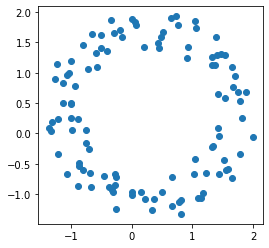

In [5]:
plt.plot(x,y,'o')
plt.axis('scaled');

In [6]:
train_coord,test_coord=np.split(last_coord_list,[86])
#print(len(train_coord))
#len(test_coord)

In [7]:
#def loss():
    
    

In [ ]:
def HNN():

In [8]:
myModel=keras.models.Sequential()
myModel.add(keras.layers.Flatten(input_shape=[2]))
myModel.add(keras.layers.Dense(200, activation="tanh"))
myModel.add(keras.layers.Dense(200, activation="tanh"))
myModel.add(keras.layers.Dense(1, activation="softmax"))

In [9]:
myModel.compile(loss="loss",
                optimizer="Adam",
                metrics=["accuracy"])

In [13]:
y_train=np.array([])
for i in range (len(x)):
    y_tarin=np.append(y_tarin,(last_coord_list[i][0]**2+last_coord_list[i][1]**2))

In [15]:
trainedModel=myModel.fit(last_coord_list, y_train, epochs=30)
                        #,validation_data=(X_valid, y_valid))

ValueError: Data cardinality is ambiguous:
  x sizes: 108
  y sizes: 0
Please provide data which shares the same first dimension.